In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
df = pd.read_csv('air4thai_44t_2024-02-01_2024-02-29.csv')
del df['Unnamed: 0']
df

,DATETIMEDATA,PM25,O3,WS,TEMP,RH,WD
0,2024-02-01 00:00:00,19.6,1.0,0,26,82,110
1,2024-02-01 01:00:00,19.2,12.0,0,26,85,108
2,2024-02-01 02:00:00,19.0,9.0,0,26,86,106
3,2024-02-01 03:00:00,17.8,1.0,0,25,88,111
4,2024-02-01 04:00:00,13.8,0.0,0,25,89,116
...,...,...,...,...,...,...,...
691,2024-02-29 19:00:00,23.4,NaN,1,29,70,116
692,2024-02-29 20:00:00,21.8,0.0,1,29,71,151
693,2024-02-29 21:00:00,25.1,0.0,1,28,71,143
694,2024-02-29 22:00:00,19.5,1.0,1,28,71,120


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATETIMEDATA  696 non-null    object 
 1   PM25          683 non-null    float64
 2   O3            572 non-null    float64
 3   WS            696 non-null    int64  
 4   TEMP          696 non-null    int64  
 5   RH            696 non-null    int64  
 6   WD            696 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 38.2+ KB


In [10]:
df.dtypes

DATETIMEDATA     object
PM25            float64
O3              float64
WS                int64
TEMP              int64
RH                int64
WD                int64
dtype: object

In [11]:
df['DATETIMEDATA'] = pd.to_datetime(df['DATETIMEDATA'])

In [12]:
df.set_index('DATETIMEDATA',
            drop=True,
            inplace=True)

In [13]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696 entries, 2024-02-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    696 non-null    float64
 1   O3      696 non-null    float64
 2   WS      696 non-null    int64  
 3   TEMP    696 non-null    int64  
 4   RH      696 non-null    int64  
 5   WD      696 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 38.1 KB


In [14]:
df

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,19.6,1.000000,0,26,82,110
2024-02-01 01:00:00,19.2,12.000000,0,26,85,108
2024-02-01 02:00:00,19.0,9.000000,0,26,86,106
2024-02-01 03:00:00,17.8,1.000000,0,25,88,111
2024-02-01 04:00:00,13.8,0.000000,0,25,89,116
...,...,...,...,...,...,...
2024-02-29 19:00:00,23.4,10.568182,1,29,70,116
2024-02-29 20:00:00,21.8,0.000000,1,29,71,151
2024-02-29 21:00:00,25.1,0.000000,1,28,71,143


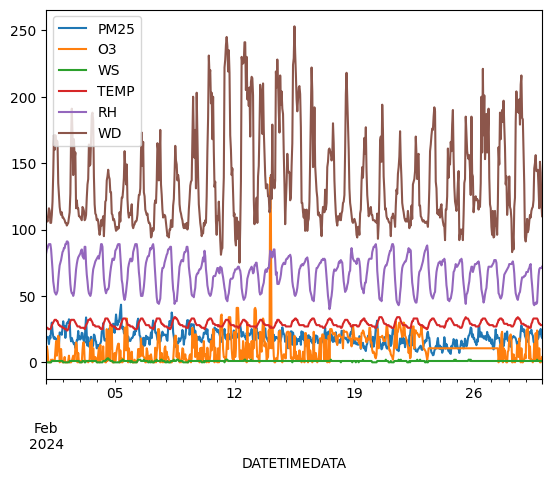

In [15]:
df.plot()
plt.show()

In [16]:
data = df
data.columns

Index(['PM25', 'O3', 'WS', 'TEMP', 'RH', 'WD'], dtype='object')

In [17]:
col = data[data.columns[0]].count()
test = data.sample(int(0.3*col), random_state=20)
train = data.drop(test.index)

In [18]:
train.shape, test.shape

((488, 6), (208, 6))

In [19]:
train

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,19.6,1.0,0,26,82,110
2024-02-01 02:00:00,19.0,9.0,0,26,86,106
2024-02-01 04:00:00,13.8,0.0,0,25,89,116
2024-02-01 05:00:00,19.7,0.0,0,25,89,114
2024-02-01 06:00:00,18.0,0.0,0,25,89,105
...,...,...,...,...,...,...
2024-02-29 15:00:00,14.9,2.0,1,33,44,144
2024-02-29 20:00:00,21.8,0.0,1,29,71,151
2024-02-29 21:00:00,25.1,0.0,1,28,71,143


In [20]:
test

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-28 04:00:00,17.8,17.000000,1,27,74,108
2024-02-19 08:00:00,19.0,18.000000,1,29,71,112
2024-02-27 08:00:00,20.6,10.568182,1,29,67,96
2024-02-18 08:00:00,22.2,10.568182,1,29,68,120
2024-02-01 10:00:00,19.5,1.000000,1,30,61,142
...,...,...,...,...,...,...
2024-02-14 22:00:00,20.9,6.000000,1,28,74,134
2024-02-02 10:00:00,19.3,0.000000,1,31,59,127
2024-02-02 11:00:00,15.8,0.000000,1,32,54,169
